In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
origin = "lower"
delta = 0.025

x, y = np.meshgrid(np.arange(-3.0, 3.01, delta), np.arange(-3.0, 3.01, delta))
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

In [3]:
nr, nc = z.shape

# put NaNs in one corner:
z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked

z = np.ma.array(z)
# mask another corner:
z[:nr // 6, :nc // 6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt(x ** 2 + y ** 2) < 0.5
z[interior] = np.ma.masked

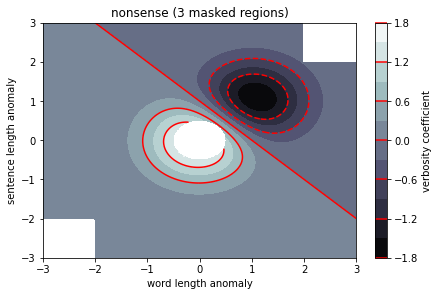

In [4]:
# automatic contour levels
fig1, ax2 = plt.subplots(constrained_layout=True)

cs1 = ax2.contourf(x, y, z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of the contour levels used for the filled contours.
# Alternatively, we could pass in additional levels to provide extra resolution,
# or leave out the *levels* keyword argument to use all of the original levels.
cs2 = ax2.contour(cs1, levels=cs1.levels[::2], colors="r", origin=origin)

ax2.set_title("nonsense (3 masked regions)")
ax2.set_xlabel("word length anomaly")
ax2.set_ylabel("sentence length anomaly")

# make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(cs1)
cbar.ax.set_ylabel("verbosity coefficient")

# add the contour line levels to the colorbar
cbar.add_lines(cs2)

plt.show()